In [79]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import geopandas
import sklearn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [80]:
df = pd.read_csv('merged_traffic_accident_data.csv', sep=',')

/var/folders/yx/q6ygl6c93jl89lzg9tzf1y6w0000gn/T/ipykernel_79572/2001673694.py:1: DtypeWarning: Columns (106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_traffic_accident_data.csv', sep=',')


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Columns: 109 entries, accident_id to acc_kategorie_chodce
dtypes: float64(23), int64(52), object(34)
memory usage: 33.7+ MB


In [82]:
df.isnull().sum()

accident_id                  0
accident_date                0
accident_lat                 0
accident_lon                 0
road_id                      0
distance_to_road             0
car_count                    0
truck_count                  0
temp_avg                     0
temp_max                     0
temp_min                     0
wind_speed                 485
pressure                     0
humidity                     0
rain_cumulative              0
snow_height                  0
sun                          0
car_2010                     0
truc_2010                    0
car_2011                     0
truc_2011                    0
car_2012                     0
truc_2012                    0
car_2013                     0
truc_2013                    0
car_2014                     0
truc_2014                    0
car_2015                     0
truc_2015                    0
car_2016                     0
truc_2016                    0
car_2017                     0
truc_201

In [83]:
df.describe()

,accident_id,accident_lat,accident_lon,road_id,distance_to_road,car_count,truck_count,temp_avg,temp_max,temp_min,wind_speed,pressure,humidity,rain_cumulative,snow_height,sun,car_2010,truc_2010,car_2011,truc_2011,car_2012,truc_2012,car_2013,truc_2013,car_2014,truc_2014,car_2015,truc_2015,car_2016,truc_2016,car_2017,truc_2017,car_2018,truc_2018,car_2019,truc_2019,car_2020,truc_2020,car_2021,truc_2021,car_2022,truc_2022,car_2023,truc_2023,acc_OBJECTID_1,acc_lz,acc_TARGET_FID_1,acc_Join_Count_1,acc_OBJECTID,acc_Join_Count,acc_TARGET_FID,acc_den,acc_vek,acc_smrt_dny,acc_rok_nar,acc_p48a,acc_p59d,acc_rok,acc_tz,acc_smrt,acc_lehce_zran_os,acc_tezce_zran_os,acc_usmrceno_os,acc_id_vozidla,acc_hodina,acc_ovlivneni_ridice,acc_cas,acc_mesic,acc_e,acc_d,acc_id_nehody,acc_hmotna_skoda_1,acc_skoda_vozidlo,road_ObjectId,acc_smrt_po
count,4.057500e+04,40575.000000,40575.000000,40575.000000,4.057500e+04,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40090.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.0,40575.000000,40575.000000,40575.000000,40575.000000,30148.000000,30289.000000,30148.000000,33047.000000,30148.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,38930.000000,40575.000000,28523.000000,40575.000000,40575.000000,4.057500e+04,40575.000000,4.057500e+04,4.057500e+04,4.057500e+04,40575.000000,14.0
mean,6.020418e+10,49.197484,16.605826,275.729587,6.144075e-04,17.874874,9.609267,10.927556,15.342733,6.315995,3.428187,987.840764,71.099963,1.641570,0.479951,5.176431,17.262921,8.484436,17.143044,8.677314,17.049982,8.717264,17.139051,8.833099,17.334689,8.989230,17.616118,9.269107,17.658805,9.318004,18.149723,9.929932,18.404436,10.117437,18.486679,10.362267,18.171288,10.516599,18.398669,10.599581,18.552286,11.330770,18.860678,11.617548,39211.011879,0.133728,39838.294097,1.0,39838.294097,0.999901,39838.294097,3.686260,39.448554,1.003863,1976.152448,2.325385,70.400823,2015.896685,0.015798,0.001602,0.394159,0.040813,0.004559,1.497534,15.778755,1.001788,1612.548441,6.704153,-1.160476e+06,-598291.908325,6.020418e+10,6.197863e+04,2.724656e+04,284.785089,1.0
std,1.094785e+08,0.024178,0.039943,168.756120,1.188629e-03,15.726535,5.186689,8.952607,10.323367,7.846246,1.578256,7.573593,14.536494,4.523252,2.258416,4.639179,15.279129,4.541707,14.797934,4.485503,14.594598,4.466976,14.917280,4.434368,15.070439,4.613163,15.237127,4.793715,15.326571,4.686015,15.911344,5.463190,16.238396,5.443244,16.454643,5.774312,16.430229,5.897643,16.803394,5.947192,17.065146,7.852666,17.446361,7.894498,20160.098679,0.340364,20397.993666,0.0,20397.993666,0.009929,20397.993666,1.874113,16.450869,0.227569,16.623265,2.370766,21.658708,3.643234,0.124694,0.039993,0.800614,0.219923,0.069531,0.658496,6.771778,0.167363,687.113879,3.517186,2.772859e+03,2830.644297,1.094785e+08,1.244638e+05,6.840143e+04,170.605030,0.0
min,6.004010e+10,49.119089,16.445719,1.000000,3.250264e-08,0.000000,0.000000,-14.500000,-12.100000,-18.300000,0.000000,948.900000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,4245.000000,0.000000,4246.000000,1.0,4246.000000,0.000000,4246.000000,1.000000,0.000000,1.000000,1912.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.169462e+06,-609768.269000,6.004010e+10,0.000000e+00,0.

In [84]:
df.head()

,accident_id,accident_date,accident_lat,accident_lon,road_id,distance_to_road,car_count,truck_count,temp_avg,temp_max,temp_min,wind_speed,pressure,humidity,rain_cumulative,snow_height,sun,car_2010,truc_2010,car_2011,truc_2011,car_2012,truc_2012,car_2013,truc_2013,car_2014,truc_2014,car_2015,truc_2015,car_2016,truc_2016,car_2017,truc_2017,car_2018,truc_2018,car_2019,truc_2019,car_2020,truc_2020,car_2021,truc_2021,car_2022,truc_2022,car_2023,truc_2023,acc_OBJECTID_1,acc_zuj,acc_alkohol_vinik,acc_hlavni_pricina,acc_srazka,acc_nasledky,acc_pricina,acc_stav_vozovky,acc_povetrnostni_podm,acc_rozhled,acc_misto_nehody,acc_druh_komun,acc_druh_vozidla,acc_mestska_cast,acc_pohlavi,acc_alkohol,acc_den_v_tydnu,acc_mesic_t,acc_katastr,acc_nasledek,acc_ozn_osoba,acc_zavineni,acc_viditelnost,acc_situovani,acc_osoba,acc_stav_ridic,acc_doba,acc_lz,acc_TARGET_FID_1,acc_Join_Count_1,acc_OBJECTID,acc_Join_Count,acc_TARGET_FID,acc_den,acc_vek,acc_smrt_dny,acc_rok_nar,acc_p48a,acc_p59d,acc_rok,acc_tz,acc_smrt,acc_lehce_zran_os,acc_tezce_zran_os,acc_usmrceno_os,acc_id_vozidla,acc_hodina,acc_ovlivneni_ridice,acc_cas,acc_mesic,acc_e,acc_d,acc_id_nehody,acc_datum,acc_hmotna_skoda_1,acc_skoda_vozidlo,acc_GlobalID,road_datum_exportu,road_ObjectId,road_GlobalID,acc_smrt_po,acc_chovani_chodce,acc_stav_chodce,acc_kategorie_chodce
0,60040100049,2010-07-08,49.159941,16.599062,197,0.000024,66,22,20.2,26.2,10.8,1.7,993.4,54.0,0.0,0.0,15.0,66,22,61,22,60,22,61,22,62,22,61,24,62,24,65,30,66,30,68,30,67,30,70,30,71,30,72,30,4245,Brno-jih,ne,nesprávný způsob jízdy,srážka s jedoucím nekolejovým vozidlem,nehoda s následky na životě nebo zdraví,řidič se plně nevěnoval řízení vozidla,"povrch suchý, neznečistěný",neztížené,dobré,žádné nebo žádné z uvedených,komunikace sledovaná (ve vybraných městech),nákladní automobil s přívěsem,Brno-jih,muž,Ne,čtvrtek,červenec,Horní Heršpice,bez zraněn,připoutaný bezpečnostními pásy (i na zadních sedadlech),řidičem motorového vozidla,"ve dne, viditelnost nezhoršená vlivem povětrnostních podmínek",na jízdním pruhu,"spolucestující na předním sedadle vedle řidiče nebo spolujezdec (cestující) na motocyklu, jízdním kole",dobrý -žádné nepříznivé okolnosti nebyly zjiště,den,0,4246,1,4246,1,4246,4,37.0,1.0,1973.0,3.0,73.0,2010,0,0,1,1,1,1.0,10.0,1.0,1055,7,-1164574.073,-599231.495,60040100049,"Thu, 08 Jul 2010 00:00:00 GMT",440000,50000,8c4d8f31-013d-4ea3-aff2-2c7339931a0e,"Wed, 26 Feb 2025 00:00:00 GMT",203,9e15e4c1-57b9-4190-a974-06b807787d03,NaN,NaN,NaN,NaN
1,60040100049,2010-07-08,49.159941,16.599062,197,0.000024,66,22,20.2,26.2,10.8,1.7,993.4,54.0,0.0,0.0,15.0,66,22,61,22,60,22,61,22,62,22,61,24,62,24,65,30,66,30,68,30,67,30,70,30,71,30,72,30,4246,Brno-jih,ne,nesprávný způsob jízdy,srážka s jedoucím nekolejovým vozidlem,nehoda s následky na životě nebo zdraví,řidič se plně nevěnoval řízení vozidla,"povrch suchý, neznečistěný",neztížené,dobré,žádné nebo žádné z uvedených,komunikace sledovaná (ve vybraných městech),nákladní automobil s přívěsem,Brno-jih,muž,Ne,čtvrtek,červenec,Horní Heršpice,bez zraněn,připoutaný bezpečnostními pásy (i na zadních sedadlech),řidičem motorového vozidla,"ve dne, viditelnost nezhoršená vlivem povětrnostních podmínek",na jízdním pruhu,řidič,dobrý -žádné nepříznivé okolnosti nebyly zjiště,den,0,4247,1,4247,1,4247,4,38.0,1.0,1972.0,3.0,72.0,2010,0,0,1,1,1,1.0,10.0,1.0,1055,7,-1164574.073,-599231.495,60040100049,"Thu, 08 Jul 2010 00:00:00 GMT",440000,50000,8aeff364-ebf6-4aa4-991d-c4aa4824b6a5,"Wed, 26 Feb 2025 00:00:00 GMT",203,9e15e4c1-57b9-4190-a974-06b807787d03,NaN,NaN,NaN,NaN
2,60040100049,2010-07-08,49.159941,16.599062,197,0.000024,66,22,20.2,26.2,10.8,1.7,993.4,54.0,0.0,0.0,15.0,66,22,61,22,60,22,61,22,62,22,61,24,62,24,65,30,66,30,68,30,67,30,70,30,71,30,72,30,4247,Brno-jih,ne,nesprávný způsob jízdy,srážka s jedoucím nekolejovým vozidlem,nehoda s následky na životě nebo zdraví,řidič se plně nevěnoval řízení vozidla,"povrch suchý, neznečistěný",neztížené,dobré,žádné nebo žádné z uvedených,komunikace sledovaná

In [85]:
df.columns

Index(['accident_id', 'accident_date', 'accident_lat', 'accident_lon',
       'road_id', 'distance_to_road', 'car_count', 'truck_count', 'temp_avg',
       'temp_max',
       ...
       'acc_hmotna_skoda_1', 'acc_skoda_vozidlo', 'acc_GlobalID',
       'road_datum_exportu', 'road_ObjectId', 'road_GlobalID', 'acc_smrt_po',
       'acc_chovani_chodce', 'acc_stav_chodce', 'acc_kategorie_chodce'],
      dtype='object', length=109)

In [86]:
data = df.copy()
data['x'] = data['accident_lon']
data['y'] = data['accident_lat']
data = data[['x', 'y', 'acc_datum', 'acc_vek']]
data['datum'] = pd.to_datetime(data['acc_datum'])


mapping = {'muž': 0, 'žena': 1}
data['pohlavi'] = df['acc_pohlavi'].map(mapping)

data.dropna()
data.head()

,x,y,acc_datum,acc_vek,datum,pohlavi
0,16.599062,49.159941,"Thu, 08 Jul 2010 00:00:00 GMT",37.0,2010-07-08,0.0
1,16.599062,49.159941,"Thu, 08 Jul 2010 00:00:00 GMT",38.0,2010-07-08,0.0
2,16.599062,49.159941,"Thu, 08 Jul 2010 00:00:00 GMT",21.0,2010-07-08,1.0
3,16.599062,49.159941,"Thu, 08 Jul 2010 00:00:00 GMT",54.0,2010-07-08,1.0
4,16.599062,49.159941,"Thu, 08 Jul 2010 00:00:00 GMT",20.0,2010-07-08,0.0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   x          40575 non-null  float64       
 1   y          40575 non-null  float64       
 2   acc_datum  40575 non-null  object        
 3   acc_vek    30148 non-null  float64       
 4   datum      40575 non-null  datetime64[ns]
 5   pohlavi    28956 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.9+ MB


In [88]:
gdf = geopandas.GeoDataFrame(
    data,
    geometry=geopandas.points_from_xy(data['x'], data['y']),
    crs="EPSG:5514"
)

/Users/robert/Documents/hackathons/bsec-2024/bsec-2025/.venv/lib/python3.12/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


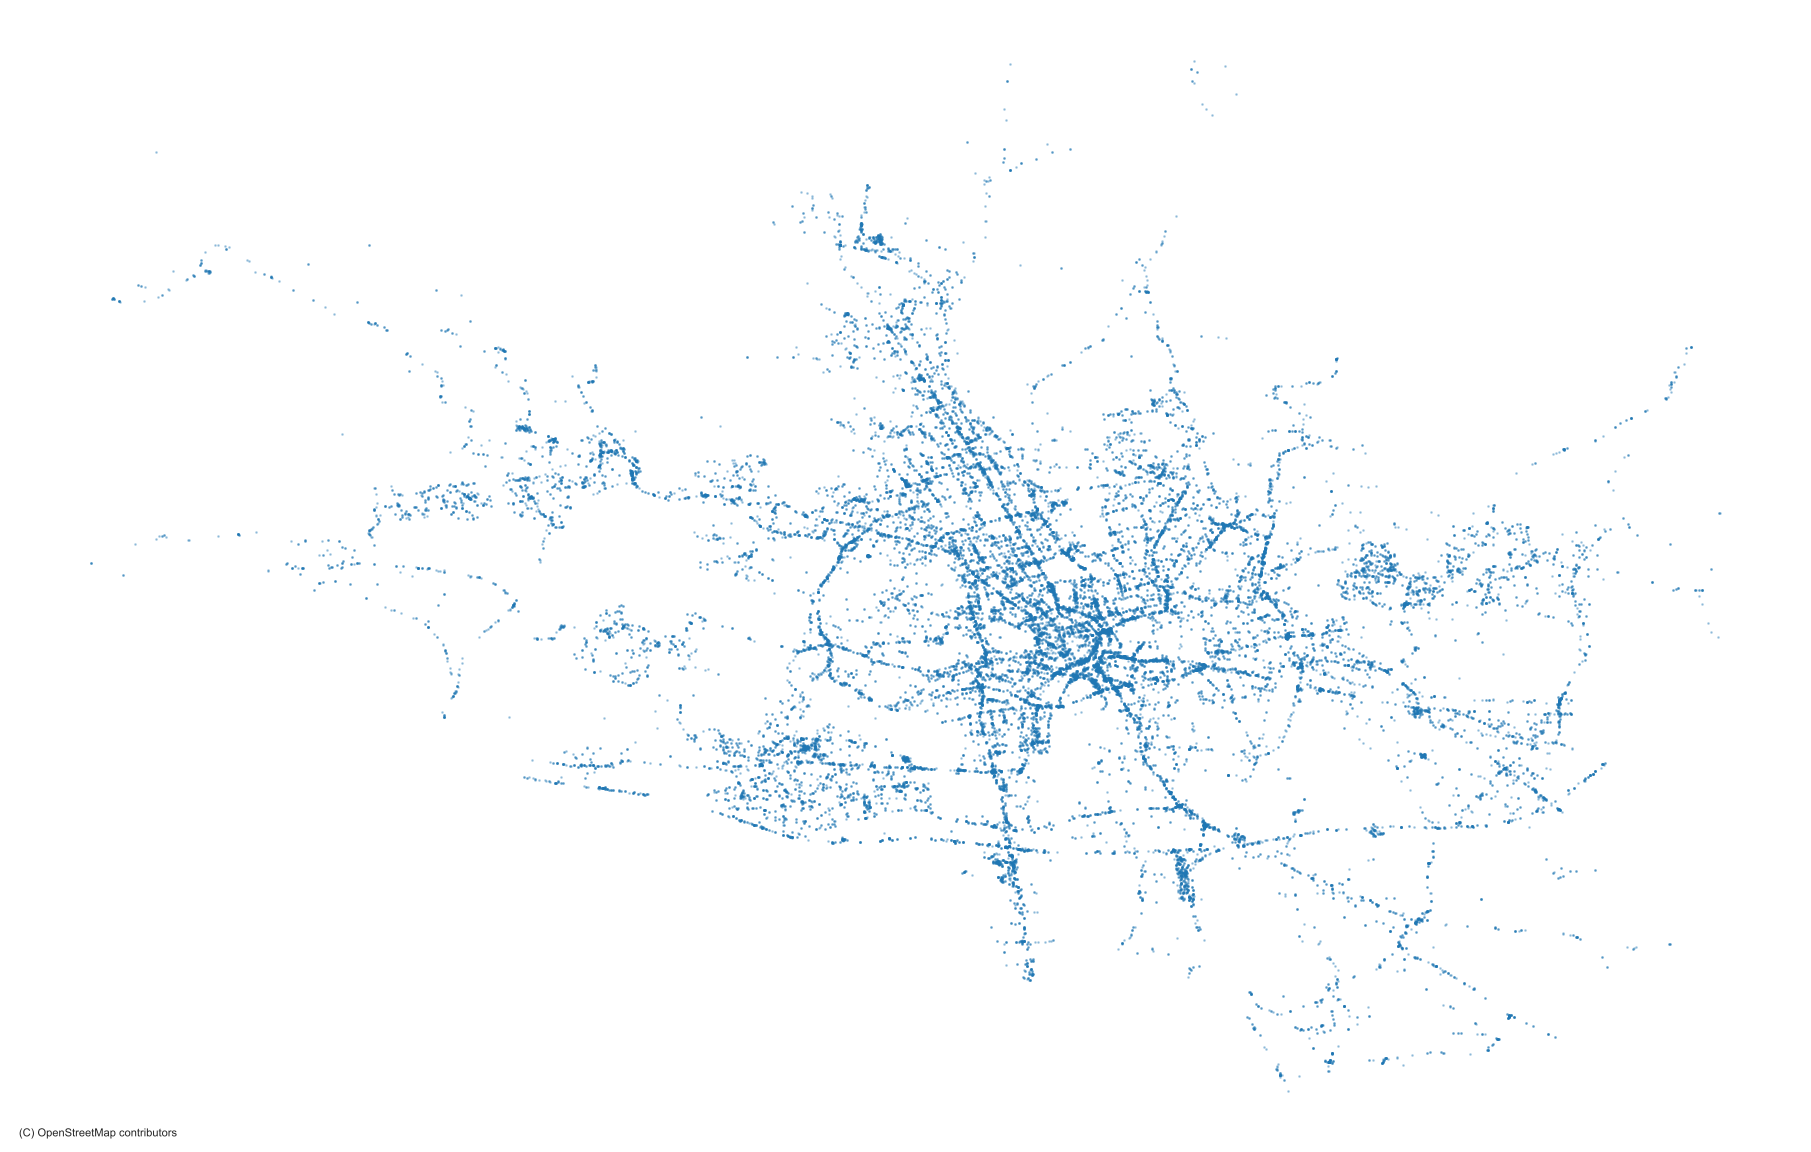

In [89]:

fig, ax = plt.subplots(figsize=(18,12), constrained_layout=True)
gdf.plot(ax=ax, markersize=1, alpha=0.3)
ctx.add_basemap(ax=ax, crs="EPSG:5514", source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()
plt.close(fig)    

In [90]:
coords = np.column_stack((gdf.geometry.x, gdf.geometry.y))

n_clusters = 1000 # random...
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=42)
gdf['cluster'] = kmeans.fit(coords).labels_
gdf = gdf.to_crs("EPSG:3857")

In [91]:
# Create polygons for each cluster
cluster_counts = gdf.groupby('cluster').size()
polygons = gdf.dissolve(by='cluster').geometry.convex_hull
polygon_gdf = geopandas.GeoDataFrame({'geometry': polygons, 'count': cluster_counts}, crs="EPSG:3857")

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=cluster_counts.min(), vmax=cluster_counts.max())

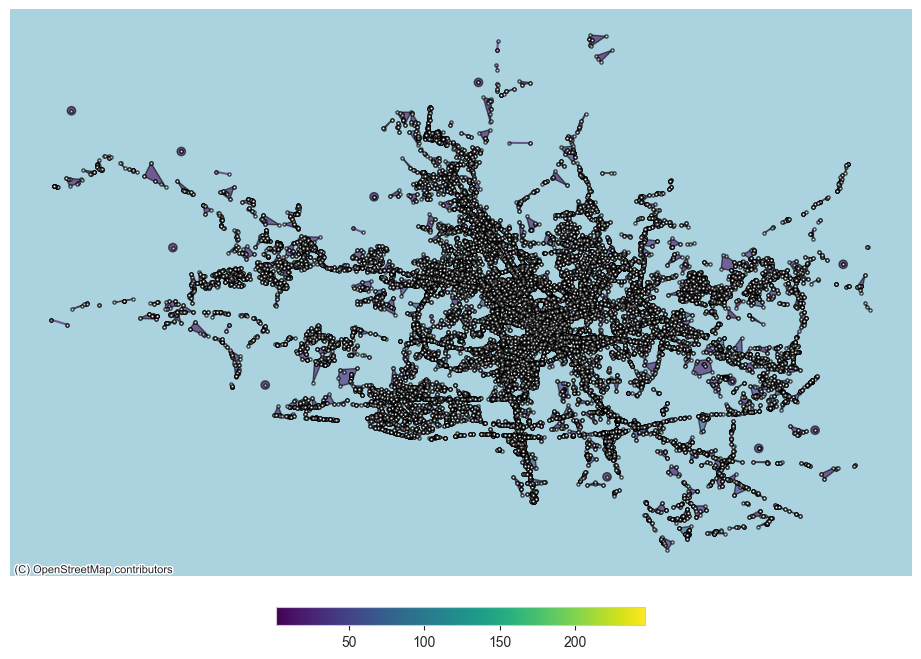

In [92]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
polygon_gdf.plot(ax=ax, color=polygon_gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor="black", alpha=0.6)
#gdf.plot(ax=ax, markersize=5, color="white", alpha=0.7, edgecolor="black")
#ctx.add_basemap(ax=ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)
#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.05)

ax.set_axis_off()
plt.show()
plt.close(fig)


In [93]:
coords = np.column_stack((gdf.geometry.x, gdf.geometry.y))

dbscan = sklearn.cluster.DBSCAN(eps=0.001, min_samples=3, metric="manhattan")
gdf['cluster'] = dbscan.fit(coords).labels_
gdf = gdf.to_crs("EPSG:3857")

In [94]:
# Create polygons for each cluster
cluster_counts = gdf.groupby('cluster').size()
polygons = gdf.dissolve(by='cluster').geometry.convex_hull
polygon_gdf = geopandas.GeoDataFrame({'geometry': polygons, 'count': cluster_counts}, crs="EPSG:3857")

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=cluster_counts.min(), vmax=cluster_counts.max())

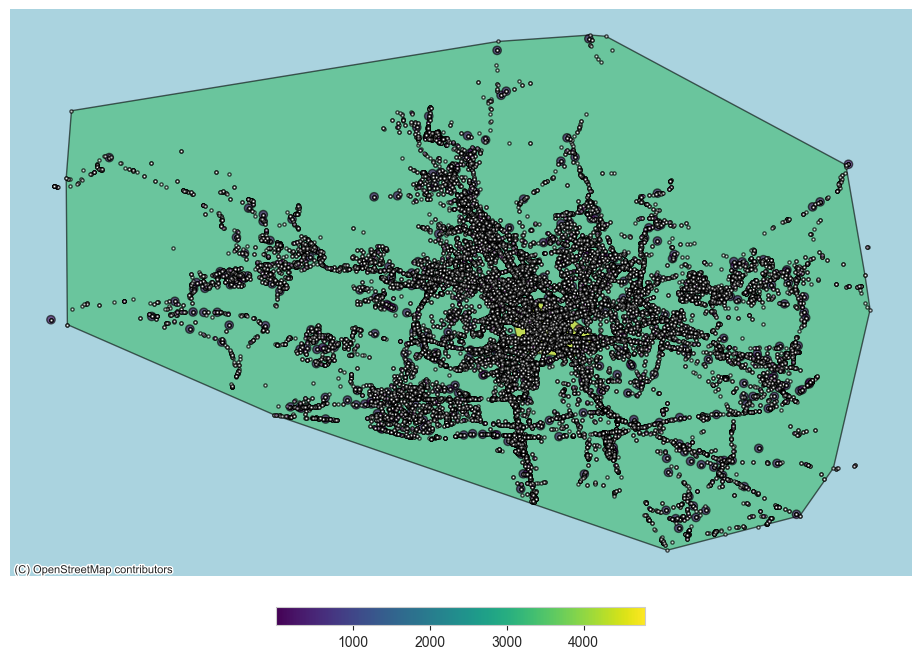

In [95]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
polygon_gdf.plot(ax=ax, color=polygon_gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor="black", alpha=0.6)
#gdf.plot(ax=ax, markersize=5, color="white", alpha=0.7, edgecolor="black")
#ctx.add_basemap(ax=ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)
#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.05)

ax.set_axis_off()
plt.show()
plt.close(fig)



In [ ]:
coords = np.column_stack((gdf.geometry.x, gdf.geometry.y))

aggr = sklearn.cluster.AgglomerativeClustering(n_clusters=1000, linkage="complete")
gdf['cluster'] = aggr.fit(coords).labels_
gdf = gdf.to_crs("EPSG:3857")

In [ ]:
# Create polygons for each cluster
cluster_counts = gdf.groupby('cluster').size()
polygons = gdf.dissolve(by='cluster').geometry.convex_hull
polygon_gdf = geopandas.GeoDataFrame({'geometry': polygons, 'count': cluster_counts}, crs="EPSG:3857")

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=cluster_counts.min(), vmax=cluster_counts.max())

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

polygon_gdf.plot(ax=ax, color=polygon_gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor="black", alpha=0.6)
#gdf.plot(ax=ax, markersize=5, color="white", alpha=0.7, edgecolor="black")
#ctx.add_basemap(ax=ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)
#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.05)

ax.set_axis_off()
plt.show()
plt.close(fig)



In [ ]:
total = data['pohlavi'].shape[0]
total_w = data['pohlavi'].sum()
print(f"Men accidents rate: {total-total_w}") 
print(f"Women accidens: {total_w}") 
print(f"Men/Women, accident rate: {(total - total_w) / total_w}") 